### Perceptron model

In [203]:
import numpy as np

class Perceptron:
    # Initializes the Perceptron with a learning rate and number of iterations.
    # Learning rate determines how much we adjust the weights with respect the loss gradient.
    # n_iters is the number of times we go through the training set.
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate  # Learning rate (how quickly the model adjusts)
        self.n_iters = n_iters  # Number of iterations over the training set
        self.activation_func = self.step_func  # Activation function (step function here)
        self.weights = None  # Weights, to be initialized in fit method
        self.bias = None  # Bias, to be initialized in fit method

    # Fit the model to the data. X is the feature set and y is the target values.
    # The method initializes weights and bias, then iteratively adjusts them based on the data.
    def fit(self, X, y):
        n_samples, n_features = X.shape  # Number of samples and features in the dataset
        self.weights = np.zeros(n_features)  # Initialize weights as zeros
        self.bias = 0  # Initialize bias to 0
        self.errors_ = []  # List to store the number of misclassifications in each iteration

        # Convert target values to 1 or -1, which are the two classes we're predicting
        y_ = np.array([1 if i > 0 else -1 for i in y])

        # Loop over the dataset n_iters times
        for iter in range(self.n_iters):
            errors = 0  # Counter for misclassifications in the current iteration
            # For each sample in the dataset
            for idx, x_i in enumerate(X):
                # Calculate the linear output (dot product of weights and sample + bias)
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Predict class label using activation function
                y_predicted = self.activation_func(linear_output)
                # Update rule for perceptron; adjust weights and bias
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                errors += int(update != 0.0)  # If update is not zero, a misclassification occurred

            error_percentage = (errors / n_samples) * 100
            self.errors_.append(error_percentage)  # Append the number of misclassifications for this iteration

            if iter % 100 == 0:
                print(f'Iter #{iter}: percentage error: {error_percentage}')
            
    # Predict the class label for a given set of features X.
    # Uses the learned weights and bias to calculate the linear output, then applies the activation function to predict class labels.
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias  # Calculate linear output
        y_predicted = self.activation_func(linear_output)  # Apply activation function
        return y_predicted

    # The step function is used as the activation function.
    # Returns 1 if input x is greater than or equal to 0, else returns -1.
    def step_func(self, x):
        return np.where(x>=0, 1, -1)  # Step function implementation


### Testing Perceptron model

Iter #0: percentage error: 15.375
Iter #100: percentage error: 15.5
Iter #200: percentage error: 15.5
Iter #300: percentage error: 14.249999999999998
Iter #400: percentage error: 15.0
Iter #500: percentage error: 14.75
Iter #600: percentage error: 14.000000000000002
Iter #700: percentage error: 15.125
Iter #800: percentage error: 14.499999999999998
Iter #900: percentage error: 14.875
Accuracy: 85.50%


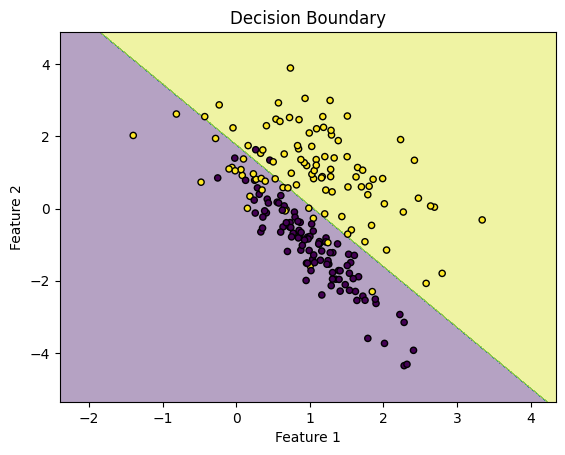

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# # Step 1: Define the points and labels
def generate_xor_data(n_samples):
    # Generate random points
    X = np.random.rand(n_samples, 2) * 2 - 1  # Scale to [-1, 1]
    # Apply XOR logic: True if only one of x or y is greater than 0
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    return X, y

# Generate dataset
n_samples = 1000  # Number of samples you want
XOR_data = False

if (XOR_data == False):
    # Generate a synthetic dataset
    X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.01, random_state=np.random.randint(1, 101))
    # Convert labels from 0,1 to -1,1
    y = np.where(y == 0, -1, 1)
else:
    # Generate XOR dataset
    X, y = generate_xor_data(n_samples)

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Perceptron model
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)

# Step 3: Train the model
perceptron.fit(X_train, y_train)

# Step 4: Evaluate the model
predictions = perceptron.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

# Step 5: Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot all data
# plot_decision_boundary(X, y, perceptron)

# Plot only test data
plot_decision_boundary(X_test, y_test, perceptron)


### Perceptron model with 1 hiden layer

In [211]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    # The sigmoid function is used for binary classification in the output layer of a neural network
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    # This function is used during the backpropagation step to calculate gradients
    return x * (1 - x)

# Define a class for a simple Multi-Layer Perceptron (MLP)
class MLP:
    # Initialize the MLP with specified learning rate and number of iterations
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate  # Learning rate for weight updates
        self.n_iters = n_iters  # Number of iterations for training
        
        # Initialize weights and biases for the input to hidden layer and hidden to output layer
        self.weights_input_hidden = np.random.uniform(-1, 1, (2, 2))  # 2 inputs -> 2 hidden neurons
        self.weights_hidden_output = np.random.uniform(-1, 1, (2, 1))  # 2 hidden neurons -> 1 output
        self.bias_hidden = np.random.uniform(-1, 1, (1, 2))  # Biases for hidden layer
        self.bias_output = np.random.uniform(-1, 1, (1, 1))  # Bias for output layer
        self.error_history = []  # Track error over iterations

    # Function to train the MLP on provided data
    def fit(self, X, y):
        for iter in range(self.n_iters):
            # Forward pass: compute activations and outputs for both layers
            hidden_layer_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = sigmoid(hidden_layer_activation)

            output_layer_activation = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            predicted_output = sigmoid(output_layer_activation)

            # Backpropagation: compute gradients and update weights and biases
            error = y - predicted_output
            d_predicted_output = error * sigmoid_derivative(predicted_output)
            
            error_hidden_layer = d_predicted_output.dot(self.weights_hidden_output.T)
            d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

            # Updating Weights and Biases using gradients and learning rate
            self.weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * self.lr
            self.weights_input_hidden += X.T.dot(d_hidden_layer) * self.lr
            
            self.bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * self.lr
            self.bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * self.lr

            # Calculate and track the percentage error at each iteration
            n_samples, _ = X.shape
            predictions = (predicted_output > 0.5).astype(int)
            incorrect_predictions = np.abs(predictions - y)
            incorrect_count = np.sum(incorrect_predictions)
            error_percentage = (incorrect_count / n_samples) * 100
            self.error_history.append(error_percentage)
            if iter % 100 == 0:
                print(f'Iter #{iter}: percentage error: {error_percentage}')

    # Function to predict output for given input data
    def predict(self, X):
        # Similar to the forward pass during training but only to compute the output
        hidden_layer_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_activation)
        output_layer_activation = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        predicted_output = sigmoid(output_layer_activation)
        return predicted_output


### Testing Perceptron model with 1 hiden layer

Iter #0: percentage error: 53.125
Iter #100: percentage error: 35.25
Iter #200: percentage error: 16.25
Iter #300: percentage error: 15.875
Iter #400: percentage error: 15.625
Iter #500: percentage error: 16.0
Iter #600: percentage error: 16.125
Iter #700: percentage error: 16.0
Iter #800: percentage error: 15.875
Iter #900: percentage error: 15.875
Accuracy: 82.00%


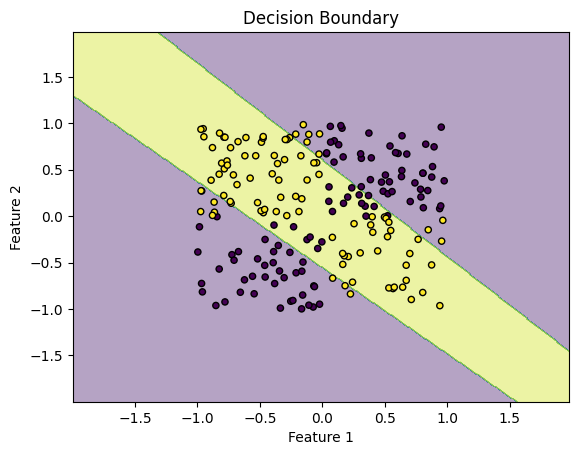

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def generate_xor_data(n_samples):
    # Generate random points
    X = np.random.rand(n_samples, 2) * 2 - 1  # Scale to [-1, 1]
    
    # Apply XOR logic: True if only one of x or y is greater than 0
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    
    return X, y

# Generate dataset
n_samples = 1000  # Number of samples you want
X, y0 = generate_xor_data(n_samples)
y = y0.reshape(-1, 1)

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Perceptron model
mlp = MLP()

# # Step 3: Train the model
mlp.fit(X_train, y_train)

# Step 4: Evaluate the model
predictions = mlp.predict(X_test)
accuracy = np.mean(np.round(predictions) == y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

# Step 5: Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = np.round(Z)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# All data
# plot_decision_boundary(X, y, mlp)

# Only test data
plot_decision_boundary(X_test, y_test, mlp)
